## Fetching Dataset

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [67]:
mnist = fetch_openml('mnist_784')
mnist.data.iloc[0]

c:\Users\Shivam kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [54]:
mnist.data.shape

(70000, 784)

In [55]:
mnist.target.shape

(70000,)

In [69]:
type(mnist.data)

pandas.core.frame.DataFrame

In [73]:
data_arr=mnist.data.to_numpy()
data_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
np.shape(data_arr)

(70000, 784)

In [76]:
target_arr=mnist.target.to_numpy()
target_arr.shape

(70000,)

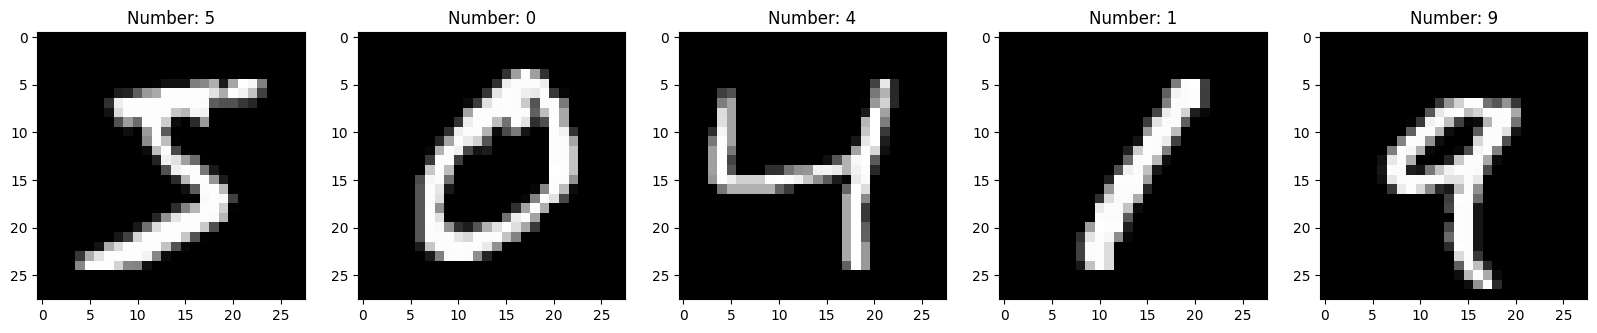

In [80]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(data_arr[:5],target_arr[:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Number: %s" % label )

In [81]:
x_train, x_test, y_train, y_test = train_test_split(data_arr,target_arr,test_size=0.2)

In [83]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = model.score(x_test,y_test)
score

c:\Users\Shivam kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9218571428571428

In [86]:
pred=model.predict([x_test[0]])[0]
pred

'8'

Predicted Value: 8


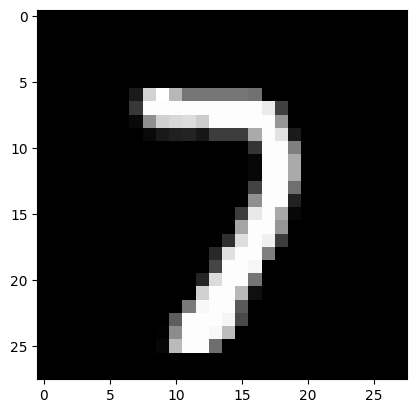

In [90]:
index=2
plt.imshow(np.reshape(x_test[index],(28,28)), cmap="gray")
print("Predicted Value: "+ model.predict([x_test[0]])[0])

In [96]:
cm=metrics.confusion_matrix(y_test,predictions)
cm

array([[1370,    0,    7,    5,    3,   15,    7,    1,   15,    0],
       [   1, 1561,    4,    3,    1,    5,    0,    6,   12,    5],
       [   7,   10, 1206,   17,   18,    5,   15,   17,   41,    6],
       [   4,    3,   27, 1276,    2,   43,    4,   14,   32,   10],
       [   3,    4,    6,    2, 1243,    2,   11,    8,   14,   57],
       [  14,    0,   11,   46,   12, 1080,   18,    6,   50,   11],
       [   7,    2,   16,    0,   12,   20, 1336,    1,    6,    1],
       [   4,    4,   19,    7,   13,    2,    1, 1370,    2,   54],
       [   7,   31,   13,   42,    8,   31,   18,    5, 1189,   11],
       [   2,    8,    1,   18,   31,   10,    2,   33,   12, 1275]],
      dtype=int64)

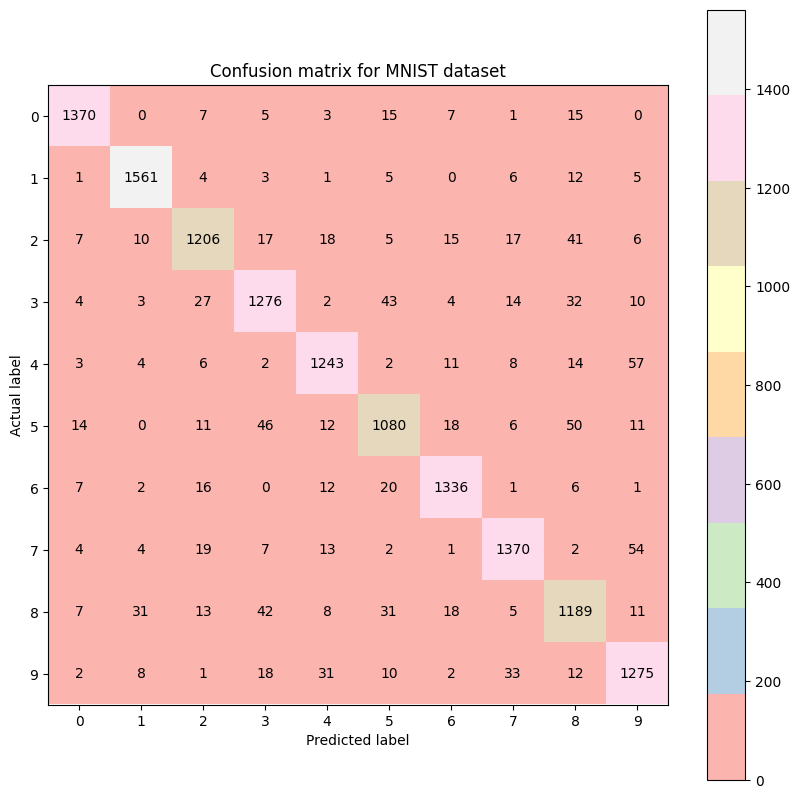

In [101]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion matrix for MNIST dataset')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.colorbar()
width,height= cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')